In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('./mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [6]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**Attribute Information:** 

classes: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

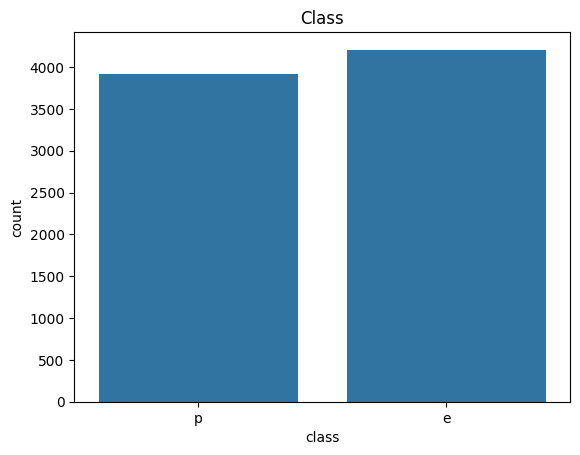

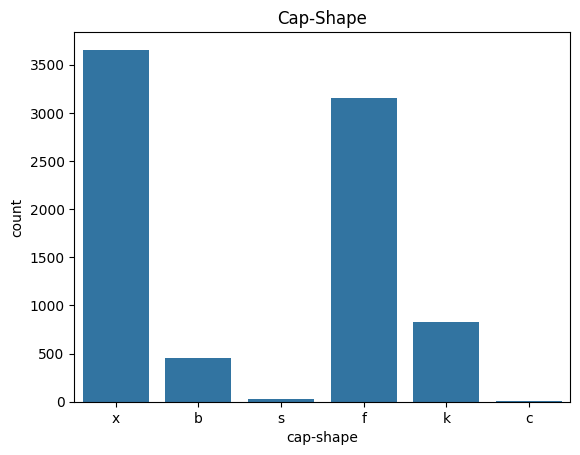

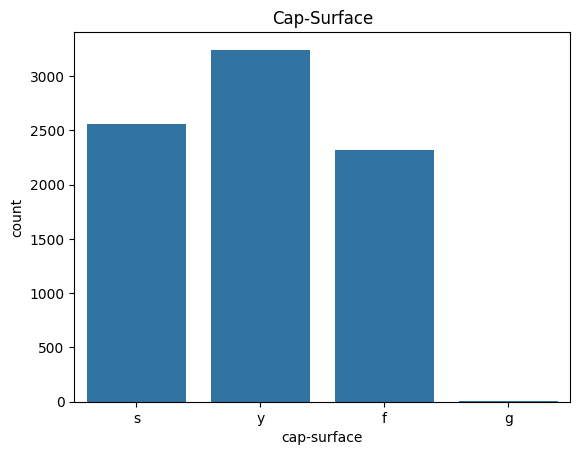

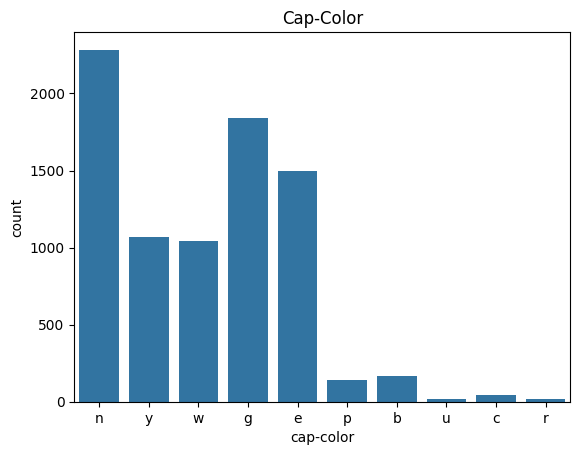

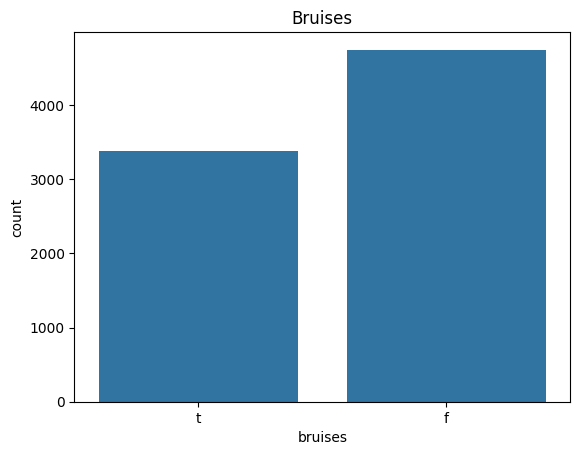

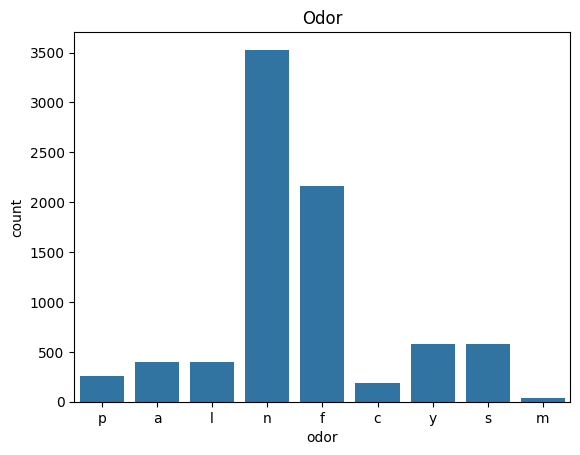

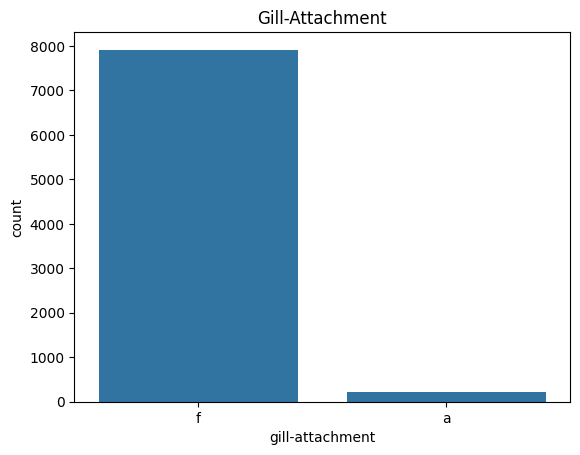

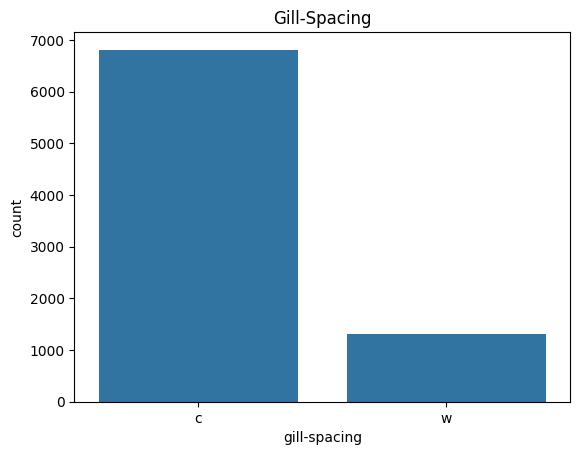

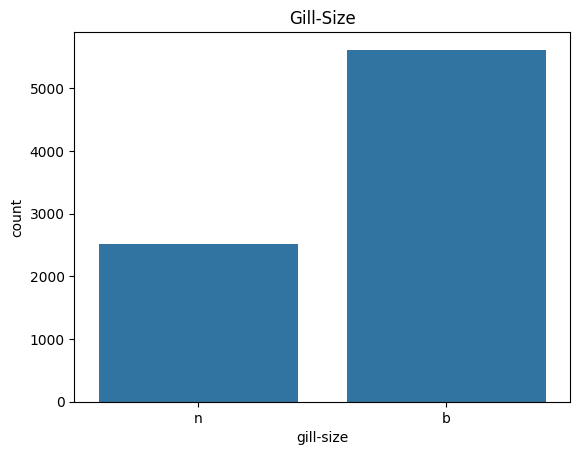

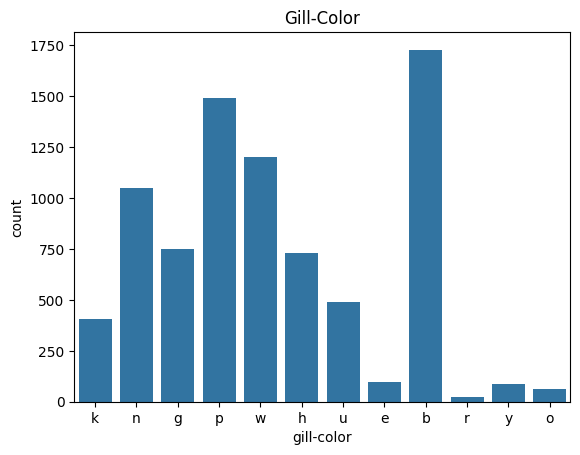

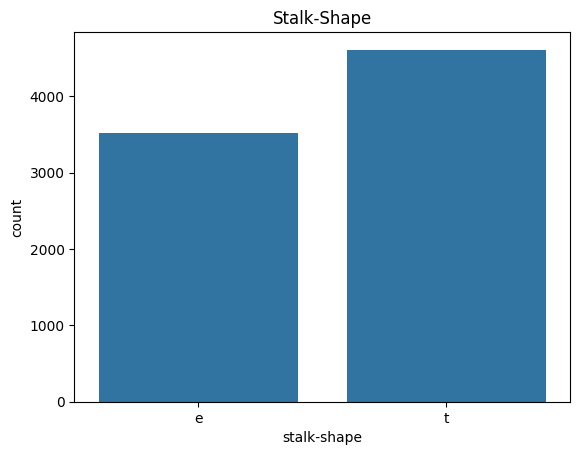

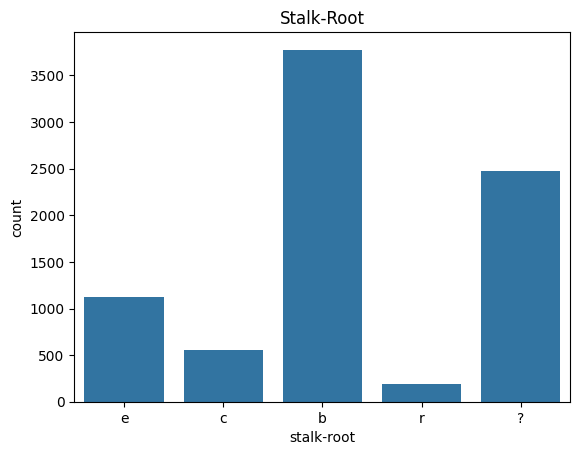

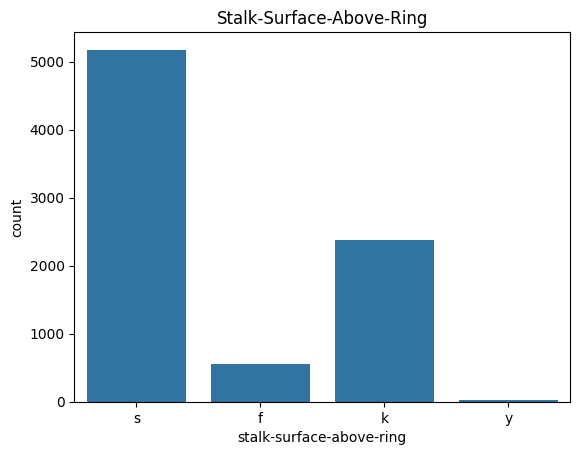

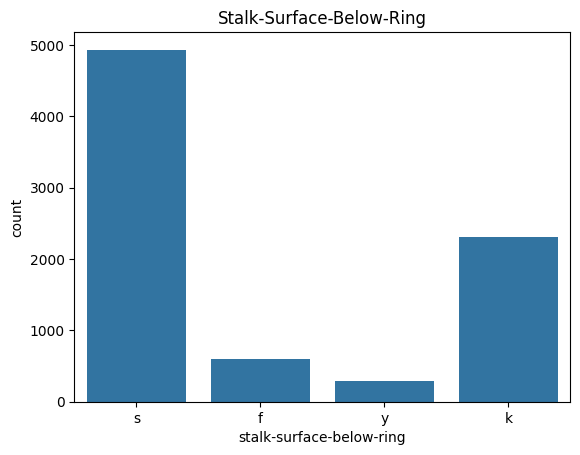

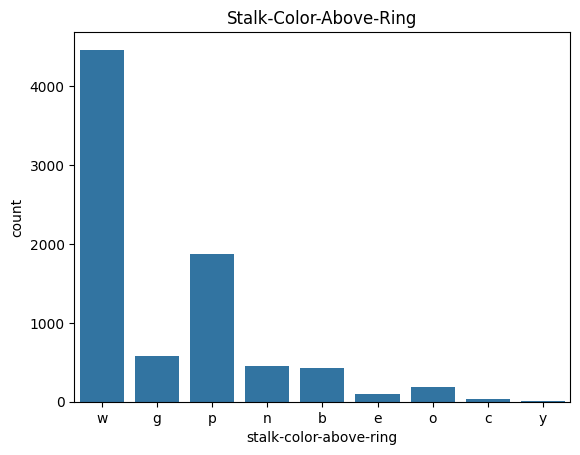

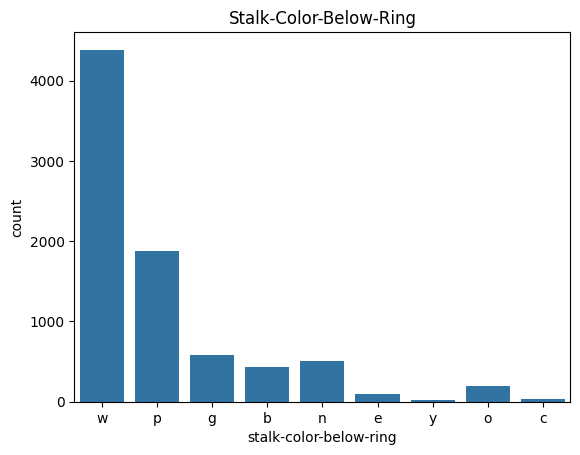

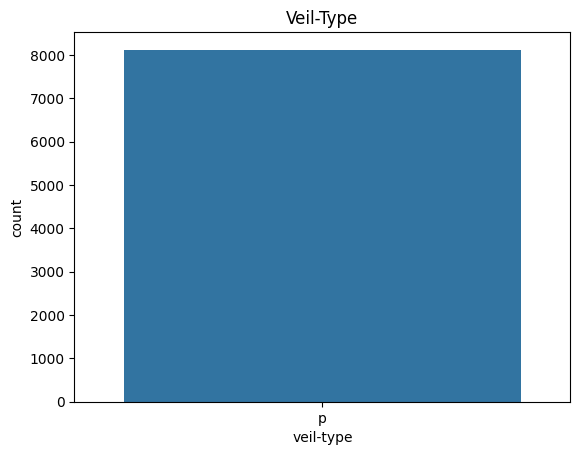

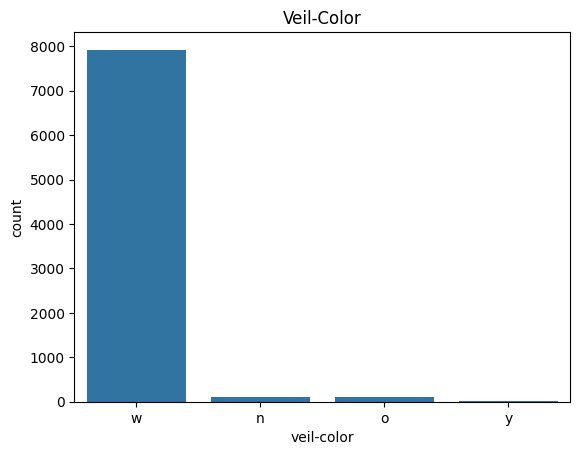

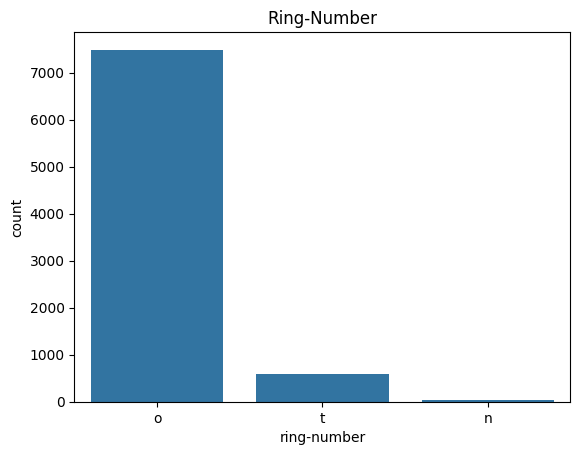

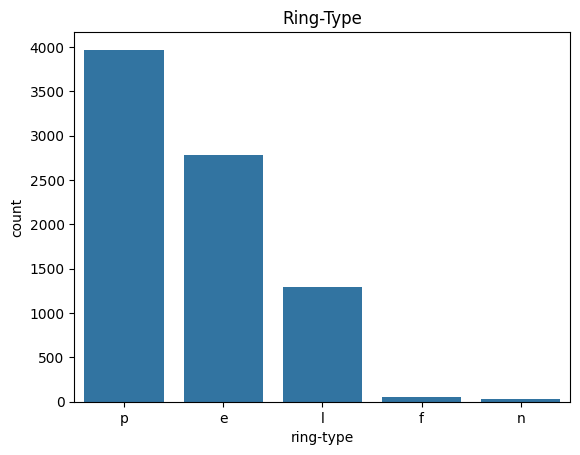

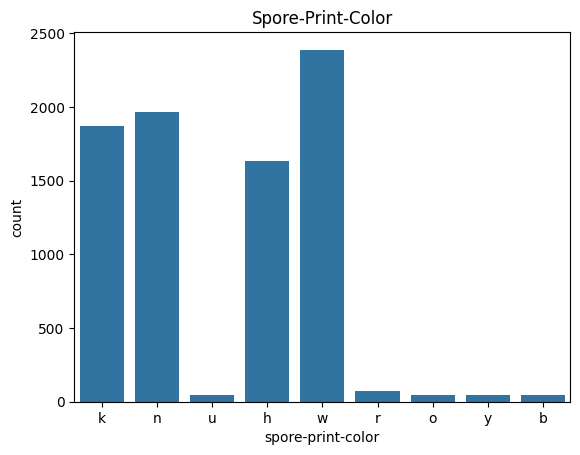

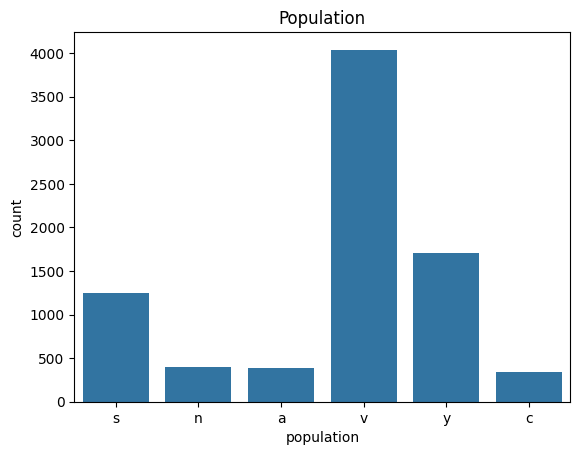

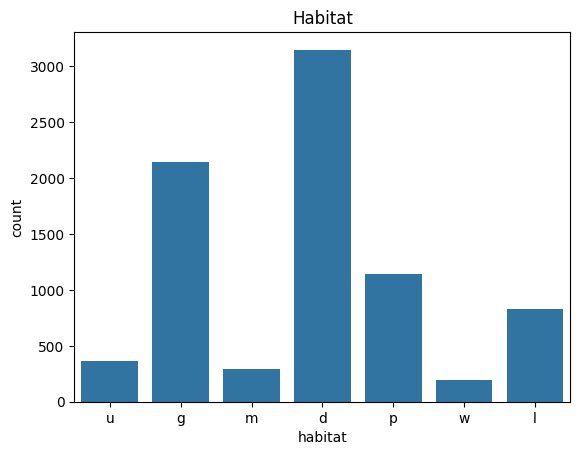

In [13]:
for i in data.columns:
    sns.countplot(data=data,x=i)
    plt.title(i.title())
    plt.show()

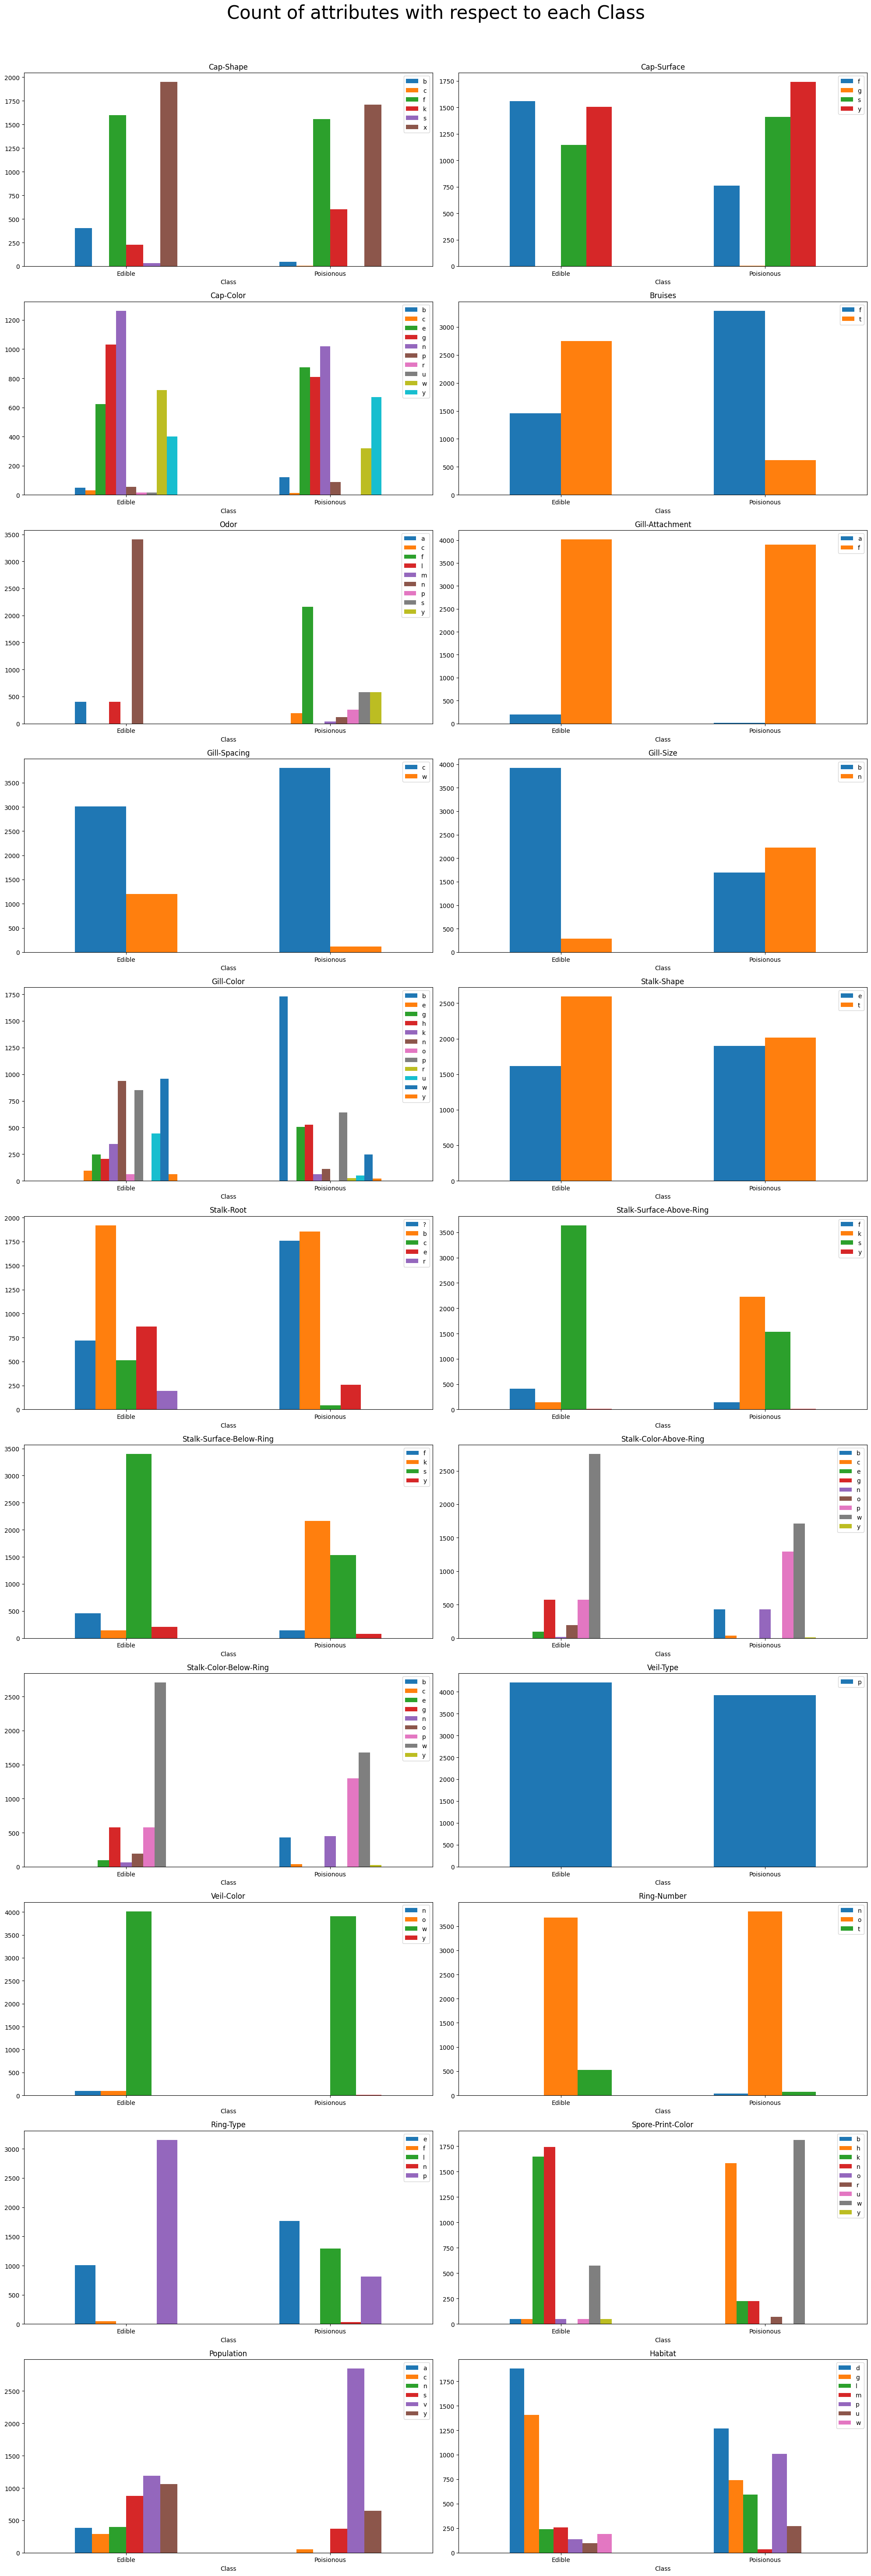

In [14]:
cols = list(data.columns)
cols.remove('class')

fig,axes = plt.subplots(nrows=11,ncols=2,figsize=(20,60))

axes = axes.flatten()

for i,j in enumerate(cols):
    data.loc[:,['class',j]].groupby('class').value_counts().unstack().plot(kind='bar',stacked=False,ax=axes[i])
    axes[i].set_title(cols[i].title())
    axes[i].set_xlabel('Class')
    axes[i].set_xticks(rotation=0,ticks=[0,1],labels=['Edible','Poisionous'])
    axes[i].legend(loc=1)
plt.tight_layout(rect=[0,0,1,0.96])
plt.suptitle('Count of attributes with respect to each Class',fontsize=30);

In [15]:
X = data.drop('class',axis=1)
y = data['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=24)

In [16]:
shape_encoder = LabelEncoder()
X_train.iloc[:,0] = shape_encoder.fit_transform(X_train.iloc[:,0])
X_test.iloc[:,0] = shape_encoder.transform(X_test.iloc[:,0])

surface_encoder = LabelEncoder()
X_train.iloc[:,1] = surface_encoder.fit_transform(X_train.iloc[:,1])
X_test.iloc[:,1] = surface_encoder.transform(X_test.iloc[:,1])

color_encoder = LabelEncoder()
X_train.iloc[:,2] = color_encoder.fit_transform(X_train.iloc[:,2])
X_test.iloc[:,2] = color_encoder.transform(X_test.iloc[:,2])

bruise_encoder = LabelEncoder()
X_train.iloc[:,3] = bruise_encoder.fit_transform(X_train.iloc[:,3])
X_test.iloc[:,3] = bruise_encoder.transform(X_test.iloc[:,3])

odor_encoder = LabelEncoder()
X_train.iloc[:,4] = odor_encoder.fit_transform(X_train.iloc[:,4])
X_test.iloc[:,4] = odor_encoder.transform(X_test.iloc[:,4])

attachment_encoder = LabelEncoder()
X_train.iloc[:,5] = attachment_encoder.fit_transform(X_train.iloc[:,5])
X_test.iloc[:,5] = attachment_encoder.transform(X_test.iloc[:,5])

spacing_encoder = LabelEncoder()
X_train.iloc[:,6] = spacing_encoder.fit_transform(X_train.iloc[:,6])
X_test.iloc[:,6] = spacing_encoder.transform(X_test.iloc[:,6])

size_encoder = LabelEncoder()
X_train.iloc[:,7] = size_encoder.fit_transform(X_train.iloc[:,7])
X_test.iloc[:,7] = size_encoder.transform(X_test.iloc[:,7])

gill_color_encoder = LabelEncoder()
X_train.iloc[:,8] = gill_color_encoder.fit_transform(X_train.iloc[:,8])
X_test.iloc[:,8] = gill_color_encoder.transform(X_test.iloc[:,8])

stalk_shape_encoder = LabelEncoder()
X_train.iloc[:,9] = stalk_shape_encoder.fit_transform(X_train.iloc[:,9])
X_test.iloc[:,9] = stalk_shape_encoder.transform(X_test.iloc[:,9])

root_encoder = LabelEncoder()
X_train.iloc[:,10] = root_encoder.fit_transform(X_train.iloc[:,10])
X_test.iloc[:,10] = root_encoder.transform(X_test.iloc[:,10])

above_surface_encoder = LabelEncoder()
X_train.iloc[:,11] = above_surface_encoder.fit_transform(X_train.iloc[:,11])
X_test.iloc[:,11] = above_surface_encoder.transform(X_test.iloc[:,11])

below_surface_encoder = LabelEncoder()
X_train.iloc[:,12] = below_surface_encoder.fit_transform(X_train.iloc[:,12])
X_test.iloc[:,12] = below_surface_encoder.transform(X_test.iloc[:,12])

above_color_encoder = LabelEncoder()
X_train.iloc[:,13] = above_color_encoder.fit_transform(X_train.iloc[:,13])
X_test.iloc[:,13] = above_color_encoder.transform(X_test.iloc[:,13])

below_color_encoder = LabelEncoder()
X_train.iloc[:,14] = below_color_encoder.fit_transform(X_train.iloc[:,14])
X_test.iloc[:,14] = below_color_encoder.transform(X_test.iloc[:,14])

veil_type_encoder = LabelEncoder()
X_train.iloc[:,15] = veil_type_encoder.fit_transform(X_train.iloc[:,15])
X_test.iloc[:,15] = veil_type_encoder.transform(X_test.iloc[:,15])

veil_color_encoder = LabelEncoder()
X_train.iloc[:,16] = veil_color_encoder.fit_transform(X_train.iloc[:,16])
X_test.iloc[:,16] = veil_color_encoder.transform(X_test.iloc[:,16])

number_encoder = LabelEncoder()
X_train.iloc[:,17] = number_encoder.fit_transform(X_train.iloc[:,17])
X_test.iloc[:,17] = number_encoder.transform(X_test.iloc[:,17])

type_encoder = LabelEncoder()
X_train.iloc[:,18] = type_encoder.fit_transform(X_train.iloc[:,18])
X_test.iloc[:,18] = type_encoder.transform(X_test.iloc[:,18])

spore_encoder = LabelEncoder()
X_train.iloc[:,19] = spore_encoder.fit_transform(X_train.iloc[:,19])
X_test.iloc[:,19] = spore_encoder.transform(X_test.iloc[:,19])

population_encoder = LabelEncoder()
X_train.iloc[:,20] = population_encoder.fit_transform(X_train.iloc[:,20])
X_test.iloc[:,20] = population_encoder.transform(X_test.iloc[:,20])

habitat_encoder = LabelEncoder()
X_train.iloc[:,21] = habitat_encoder.fit_transform(X_train.iloc[:,21])
X_test.iloc[:,21] = habitat_encoder.transform(X_test.iloc[:,21])

class_encoder = LabelEncoder()
y_train = class_encoder.fit_transform(y_train)
y_test = class_encoder.transform(y_test)

In [17]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [18]:
model = Sequential(
    [Dense(48,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(48,activation='relu'),
    Dense(1,activation='sigmoid')]
)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\datta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 48)             │         1,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         2,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,505 (13.69 KB)

 Trainable params: 3,505 (13.69 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train,pd.Series(y_train),validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7973 - loss: 0.4235 - val_accuracy: 0.9218 - val_loss: 0.2111
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9400 - loss: 0.1643 - val_accuracy: 0.9649 - val_loss: 0.1125
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.0951 - val_accuracy: 0.9717 - val_loss: 0.0984
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.0691 - val_accuracy: 0.9883 - val_loss: 0.0385
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9925 - loss: 0.0301 - val_accuracy: 0.9963 - val_loss: 0.0244
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9984 - loss: 0.0175 - val_accuracy: 0.9982 - val_loss: 0.0159
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0125 - val_accuracy: 0.9957 - val_loss: 0.0132
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9962 - loss: 0.0125 - val_accu

In [20]:
loss,accuracy = model.evaluate(X_test,y_test)

print(accuracy)
print(loss)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 4.8435e-06
1.0
4.649673883250216e-06


In [21]:
accuracy_score(y_true=y_test.reshape(-1,1),y_pred=(model.predict(X_test)>0.5).astype(int))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


1.0

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


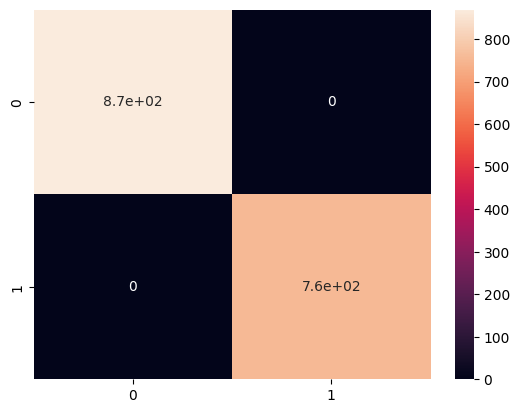

In [22]:
sns.heatmap(confusion_matrix(y_pred=(model.predict(X_test)>0.5).astype(int),y_true=y_test.reshape(-1,1)),annot=True);

In [30]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=32,layers=1,activation='relu'):
    model = Sequential()
    model.add(Dense(neurons,activation=activation,input_shape=(X_train.shape[1],)))

    for _ in range(layers-1):
        model.add(Dense(neurons,activation=activation))

    model.add(Dense(1,activation=activation))

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    return model

In [31]:
model = KerasClassifier(build_fn=create_model,epochs=20,batch_size=32,verbose=0,layers=2,neurons=16,activation='sigmoid')

params_grid = {
    'activation':['relu','sigmoid','tanh'],
    'neurons':[16,32,48,64],
    'layers':[1,2],
    'epochs':[20,40,60,80,100]
}

classifier = GridSearchCV(estimator=model,param_grid=params_grid,n_jobs=-1,cv=5)

result = classifier.fit(X_train,y_train)

C:\Users\datta\AppData\Roaming\Python\Python312\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\datta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
result.best_params_

{'activation': 'sigmoid', 'epochs': 40, 'layers': 2, 'neurons': 32}

In [34]:
accuracy_score(y_pred=result.predict(X_test),y_true=y_test)

1.0

In [36]:
result.best_params_

{'activation': 'sigmoid', 'epochs': 40, 'layers': 2, 'neurons': 32}

In [35]:
result.best_estimator_

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x0000024C003905E0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=40
	layers=2
	neurons=32
	activation=sigmoid
	class_weight=None
)

In [39]:
model = Sequential(
    [Dense(32,activation='sigmoid',input_shape=(X_train.shape[1],)),
    Dense(32,activation='sigmoid'),
    Dense(1,activation='sigmoid')]
)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\datta\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,825 (7.13 KB)

 Trainable params: 1,825 (7.13 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train,pd.Series(y_train),validation_data=(X_test,y_test),epochs=40)

Epoch 1/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7037 - loss: 0.6293 - val_accuracy: 0.8406 - val_loss: 0.4229
Epoch 2/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3643 - val_accuracy: 0.8954 - val_loss: 0.2800
Epoch 3/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9093 - loss: 0.2498 - val_accuracy: 0.9163 - val_loss: 0.2325
Epoch 4/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9264 - loss: 0.2100 - val_accuracy: 0.9323 - val_loss: 0.1981
Epoch 5/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9380 - loss: 0.1767 - val_accuracy: 0.9471 - val_loss: 0.1732
Epoch 6/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9489 - loss: 0.1490 - val_accuracy: 0.9526 - val_loss: 0.1491
Epoch 7/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9613 - loss: 0.1232 - val_accuracy: 0.9594 - val_loss: 0.1147
Epoch 8/40
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9656 - loss: 0.1059 - val_accuracy: 0.

In [41]:
accuracy_score(y_true=y_test.reshape(-1,1),y_pred=(model.predict(X_test)>0.5).astype(int))

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


1.0